# Sleep Summary - Sleep Health

## Dataset y libraries

### Library imports

In [50]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime
from datetime import timedelta
from gettext import install
from tqdm import tqdm
import time
import matplotlib.ticker as ticker

### Data import

In [51]:
# Importamos el Activity_Event_
with open('data_sources/simulation/sleep_health/sleep_summary.json') as file:
    data = json.load(file)

## Summary

### Duration

Sleep Start Time: 06/17/24 22:23:30
Sleep End Time: 06/18/24 05:00:30
Total Sleep Duration: 6:14:30
Time in Bed: 12:51:41


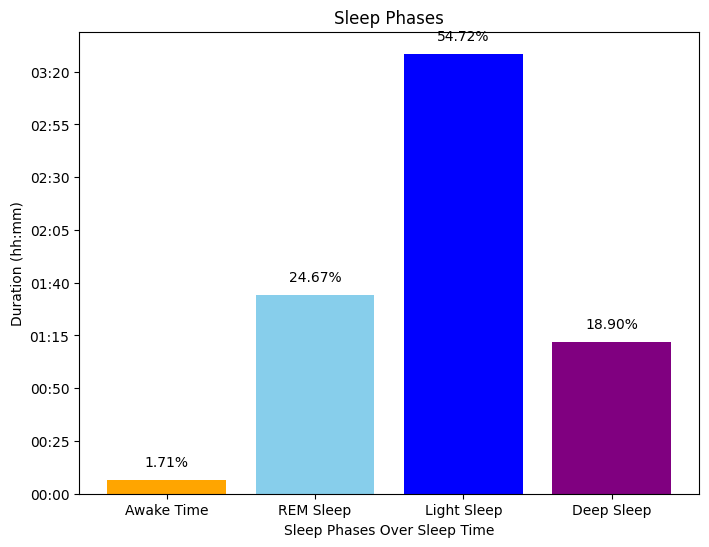

In [52]:
sleep_data = data['sleep_health']['summary']['sleep_summary']['duration']

# Extract start and end times from the data

sleep_start = sleep_data['sleep_start_datetime_string']
sleep_end = sleep_data['sleep_end_datetime_string']

# Convert start and end times to datetime objects
sleep_start_time = datetime.fromisoformat(sleep_start)
sleep_end_time = datetime.fromisoformat(sleep_end)

# Calculate total sleep duration and time in bed as timedelta objects
total_sleep_duration = timedelta(seconds=sleep_data['sleep_duration_seconds_int'])
time_in_bed = timedelta(seconds=sleep_data['time_in_bed_seconds_int'])

if sleep_start:
    sleep_start_result = f"Sleep Start Time: {sleep_start_time.strftime('%D %H:%M:%S')}"
    
else:
    sleep_start_result = 'Sleep Start Time: No values ​​were obtained or it is null.'
    
if sleep_end:
    sleep_end_result = f"Sleep End Time: {sleep_end_time.strftime('%D %H:%M:%S')}"
    
else:
    sleep_end_result = 'Sleep End Time: No values ​​were obtained or it is null.'
    
if total_sleep_duration:
    total_sleep_duration_result = f"Total Sleep Duration: {str(total_sleep_duration)}"

else:
    total_sleep_duration_result = 'Total Sleep Duration: No values ​​were obtained or it is null.'
    
if time_in_bed:
    time_in_bed_result = f"Time in Bed: {str(time_in_bed)}"
    
else:
    time_in_bed_result = "Time in Bed: No values ​​were obtained or it is null."

# Print start time, end time, total sleep duration and time in bed in HH:MM:SS format
print(sleep_start_result)
print(sleep_end_result)
print(total_sleep_duration_result)
print(time_in_bed_result)

# Labels for different sleep phases
labels = ['Awake Time', 'REM Sleep', 'Light Sleep', 'Deep Sleep']

# Durations in seconds for each phase
durations = [
    sleep_data['time_awake_during_sleep_seconds_int'],
    sleep_data['rem_sleep_duration_seconds_int'],
    sleep_data['light_sleep_duration_seconds_int'],
    sleep_data['deep_sleep_duration_seconds_int']
]

# Check if any of the sleep duration values are None or null  
if sleep_data:
    # Convert seconds to minutes for better readability
    durations_in_minutes = [d / 60 for d in durations]

    # Calculate total sleep duration including awake time
    total_sleep_duration_seconds = sleep_data['sleep_duration_seconds_int'] + sleep_data['time_awake_during_sleep_seconds_int']

    # Calculate percentages for each sleep phase based on total sleep duration
    percentages = [(d / total_sleep_duration_seconds) * 100 for d in durations]

    # Function to format y-axis labels as hh:mm
    def minutes_to_hhmm(x, _):
        hours = int(x // 60)
        minutes = int(x % 60)
        return f'{hours:02d}:{minutes:02d}'

    # Plotting with hh:mm format on y-axis
    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, durations_in_minutes, color=['orange', 'skyblue', 'blue', 'purple'])

    # Adding percentage labels on top of each bar
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f'{percentage:.2f}%', ha='center', va='bottom')

    # Set y-axis label format
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(minutes_to_hhmm))

    plt.xlabel('Sleep Phases Over Sleep Time')
    plt.ylabel('Duration (hh:mm)')
    plt.title('Sleep Phases')
    plt.show()
    
else:
        # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Sleep Phases: chart not possible.', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

### Scores

In [53]:
sleep_quality = data['sleep_health']['summary']['sleep_summary']['scores']['sleep_quality_rating_1_5_score_int']
sleep_efficiency = data['sleep_health']['summary']['sleep_summary']['scores']['sleep_efficiency_1_100_score_int']
sleep_goal_seconds = data['sleep_health']['summary']['sleep_summary']['scores']['sleep_goal_seconds_int']
sleep_continuity_score = data['sleep_health']['summary']['sleep_summary']['scores']['sleep_continuity_1_5_score_int']
sleep_continuity_rating = data['sleep_health']['summary']['sleep_summary']['scores']['sleep_continuity_1_5_rating_int']

if sleep_quality:
    sleep_quality_result = f"Sleep Quality: {sleep_quality}"
    
else:
    sleep_quality_result = 'Sleep Quality: No values ​​were obtained or it is null.'
    
if sleep_efficiency:
    sleep_efficiency_result = f"Sleep Efficiency: {sleep_efficiency}"
    
else:
    sleep_efficiency_result = 'Sleep Efficiency: No values ​​were obtained or it is null.'
    
if sleep_goal_seconds is not None:
    sleep_goal = timedelta(seconds=sleep_goal_seconds)
    sleep_goal_result = f"Sleep Goal: {str(sleep_goal)}"
else:
    sleep_goal_result = "Sleep Goal: No values were obtained or it is null."
    
if sleep_continuity_score:
    sleep_continuity_score_result = f"Sleep Continuity Score: {sleep_continuity_score}"
    
else:
    sleep_continuity_score_result = 'Sleep Continuity Score: No values ​​were obtained or it is null.'
    
if sleep_continuity_rating:
    sleep_continuity_rating_result = f"Sleep Efficiency: {sleep_continuity_rating}"
    
else:
    sleep_continuity_rating_result = 'Sleep Efficiency: No values ​​were obtained or it is null.'
    
print(sleep_quality_result)
print(sleep_efficiency_result)
print(sleep_goal_result)
print(sleep_continuity_score_result)
print(sleep_continuity_rating_result)
    


Sleep Quality: 5
Sleep Efficiency: 85
Sleep Goal: No values were obtained or it is null.
Sleep Continuity Score: No values ​​were obtained or it is null.
Sleep Efficiency: No values ​​were obtained or it is null.


### Heart Rate

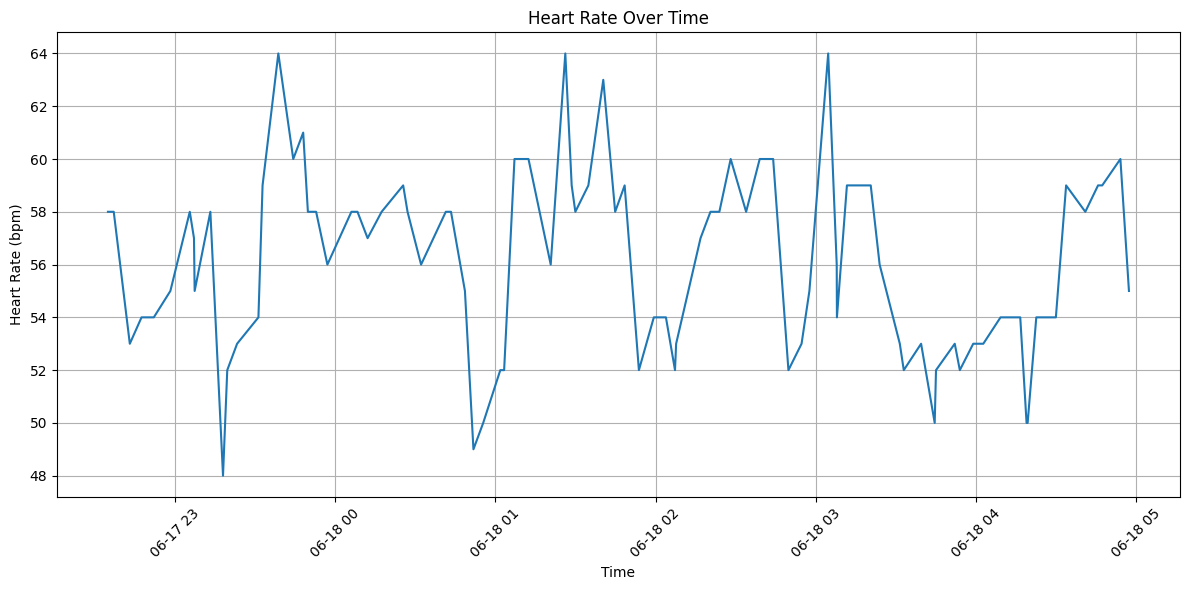

Heart Rate Average: 56 bpm.
Heart Rate Maximus: 64 bpm.
Heart Rate Minimus: 48 bpm.


In [54]:
hr_avg = data['sleep_health']['summary']['sleep_summary']['heart_rate']['hr_avg_bpm_int']
hr_max = data['sleep_health']['summary']['sleep_summary']['heart_rate']['hr_maximum_bpm_int']
hr_min = data['sleep_health']['summary']['sleep_summary']['heart_rate']['hr_minimum_bpm_int']
hr_granular = data['sleep_health']['summary']['sleep_summary']['heart_rate']['hr_granular_data_array']

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hr_granular]
heart_rates = [item['hr_bpm_int'] for item in hr_granular]

if hr_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.title('Heart Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Heart Reate Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

# HR avg
if hr_avg is None:
    hr_avg_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_result = f'Heart Rate Average: {hr_avg} bpm.'

# HR maximus
if hr_max is None:
    hr_max_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    hr_max_result = f'Heart Rate Maximus: {hr_max} bpm.'
    
# HR minimus
if hr_min is None:
    hr_min_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    hr_min_result = f'Heart Rate Minimus: {hr_min} bpm.'

print(hr_avg_result)
print(hr_max_result)
print(hr_min_result)

### HRV

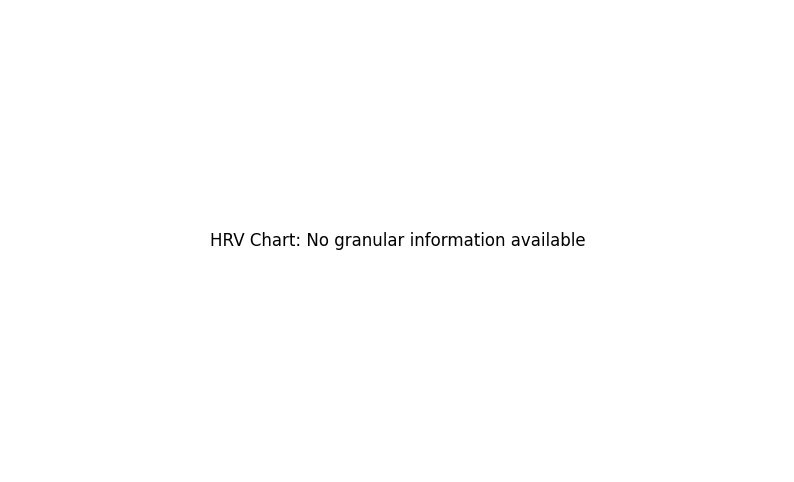

HRV Avg: No values ​​were obtained or it is null.


In [55]:
hrv_avg = data['sleep_health']['summary']['sleep_summary']['heart_rate']['hrv_avg_sdnn_float']
hrv_granular = data['sleep_health']['summary']['sleep_summary']['heart_rate']['hrv_sdnn_granular_data_array']

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hrv_granular]
heart_rates = [item['hrv_sdnn_float'] for item in hrv_granular]

if hrv_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.scatter(datetimes, heart_rates, color='red', label='Data points') 
    plt.title('HRV Over Time')
    plt.xlabel('Time')
    plt.ylabel('HRV (ms)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'HRV Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()
    
# HRV avg
if hrv_avg is None:
    hrv_avg_body_summary_result = "HRV Avg: No values ​​were obtained or it is null."
else:
    hrv_avg_body_summary_result = f'HRV Average: {hrv_avg} bpm.'

print(hrv_avg_body_summary_result)

### Temperature

Temperature Average: 33.5 °C.
Temperature Maximum: 34 °C.
Temperature Minimum: 32 °C.


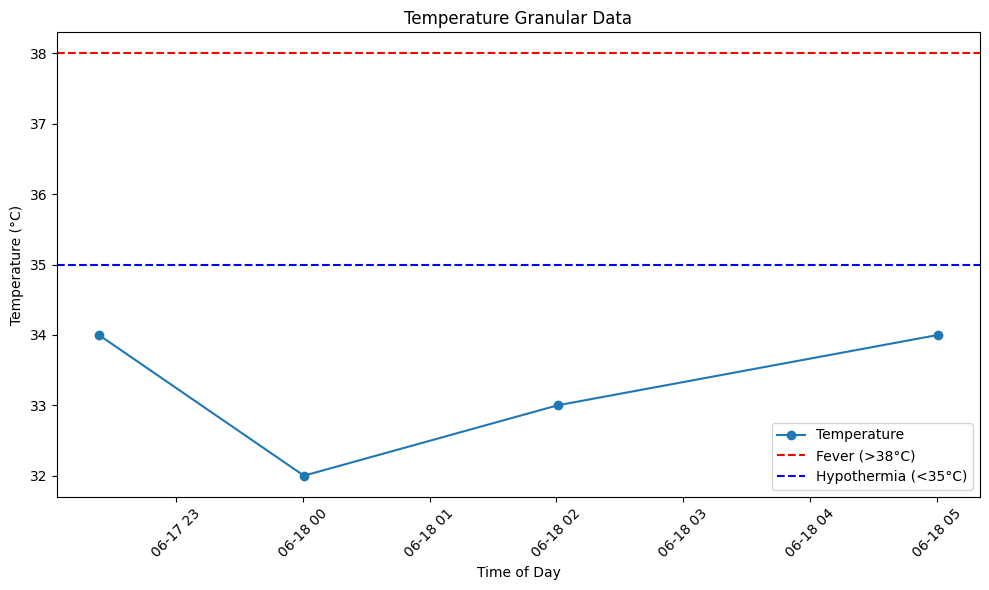

In [59]:
temperature_avg = data['sleep_health']['summary']['sleep_summary']['temperature'].get('temperature_avg_object', {}).get('temperature_celsius_float', None)
temperature_max = data['sleep_health']['summary']['sleep_summary']['temperature'].get('temperature_maximum_object', {}).get('temperature_celsius_float', None)
temperature_min = data['sleep_health']['summary']['sleep_summary']['temperature'].get('temperature_minimum_object', {}).get('temperature_celsius_float', None)
temperature_granular = data['sleep_health']['summary']['sleep_summary']['temperature'].get('temperature_granular_data_array', None)

# Handle Temperature Average
if temperature_avg is None:
    if temperature_granular:
        granular_df = pd.DataFrame(temperature_granular)
        temperature_avg = granular_df['temperature_celsius_float'].mean()
    else:
        temperature_avg = "Temperature Average: No values ​​were obtained or it is null."

# Handle Temperature Maximum
if temperature_max is None:
    if temperature_granular:
        granular_df = pd.DataFrame(temperature_granular)
        temperature_max = granular_df['temperature_celsius_float'].max()
    else:
        temperature_max = "Temperature Max: No values ​​were obtained or it is null."

# Handle Temperature Minimum
if temperature_min is None:
    if temperature_granular:
        granular_df = pd.DataFrame(temperature_granular)
        temperature_min = granular_df['temperature_celsius_float'].min()
    else:
        temperature_min = "Temperature Min: No values ​​were obtained or it is null."

# Display the results
temperature_avg_result = f'Temperature Average: {temperature_avg} °C.'
temperature_max_result = f'Temperature Maximum: {temperature_max} °C.'
temperature_min_result = f'Temperature Minimum: {temperature_min} °C.'

print(temperature_avg_result)
print(temperature_max_result)
print(temperature_min_result)

if temperature_granular and 'datetime_string' in temperature_granular[0]:
    df = pd.DataFrame(temperature_granular)
    df['datetime'] = pd.to_datetime(df['datetime_string'])

    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime'], df['temperature_celsius_float'], marker='o', linestyle='-', label='Temperature')
    plt.axhline(y=38, color='r', linestyle='--', label='Fever (>38°C)')
    plt.axhline(y=35, color='b', linestyle='--', label='Hypothermia (<35°C)')
    plt.title('Temperature Granular Data')
    plt.xlabel('Time of Day')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    # Mostrar un mensaje en lugar del gráfico si no hay información granular o falta el campo
    print("No granular data or 'datetime_string' not found in data.")
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Temperature Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

### Breathing

Saturation Average: 14%
Saturation Max: 25%
Saturation Min: 11%


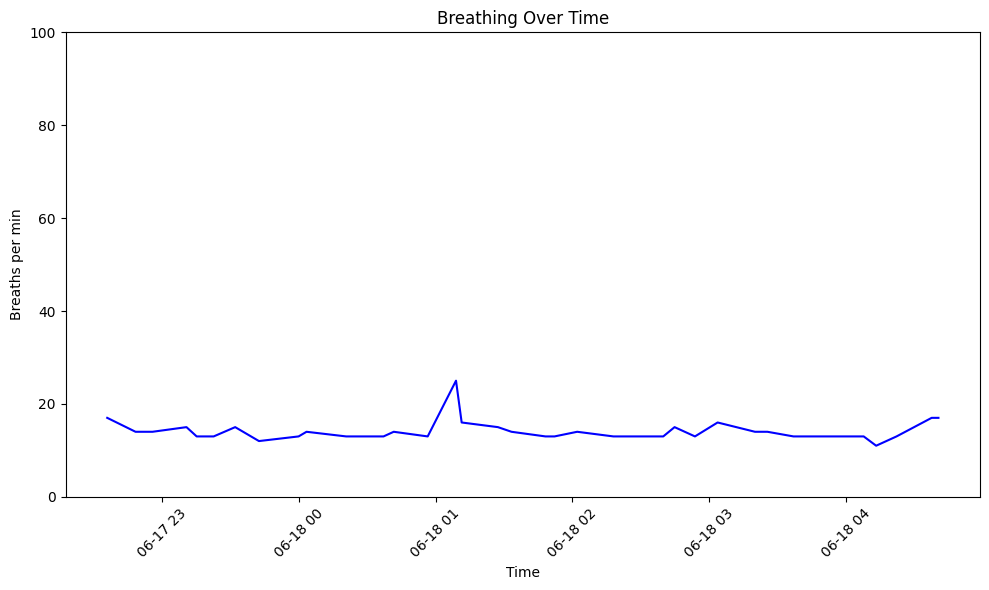

In [64]:
breaths_avg = data['sleep_health']['summary']['sleep_summary']['breathing']['breaths_avg_per_min_int']
breaths_max = data['sleep_health']['summary']['sleep_summary']['breathing']['breaths_maximum_per_min_int']
breaths_min = data['sleep_health']['summary']['sleep_summary']['breathing']['breaths_minimum_per_min_int']
breaths_granular = data['sleep_health']['summary']['sleep_summary']['breathing']['breathing_granular_data_array']

# Checking the average
if breaths_avg is not None and breaths_avg > 0:
    print(f"Saturation Average: {breaths_avg}%")
else:
    print("Saturation Average: No values were obtained or it is null")
    
# Checking the max
if breaths_max is not None and breaths_max > 0:
    print(f"Saturation Max: {breaths_max}%")
else:
    print("Saturation Max: No values were obtained or it is null")
    
# Checking the min
if breaths_min is not None and breaths_min > 0:
    print(f"Saturation Min: {breaths_min}%")
else:
    print("Saturation Min: No values were obtained or it is null")

# Creating a DataFrame for the granular data
if breaths_granular:
    df = pd.DataFrame(breaths_granular)
    df['datetime_string'] = pd.to_datetime(df['datetime_string'])
    
    # Plotting the bar chart for saturation
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime_string'], df['breaths_per_min_int'], color='blue', label='Breaths per min')
    plt.ylim(0, 100)
    plt.title('Breathing Over Time')
    plt.xlabel('Time')
    plt.ylabel('Breaths per min')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Breathing: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()

### Saturation

Saturation Average: 94%
Saturation Max: 96%
Saturation Min: 92%


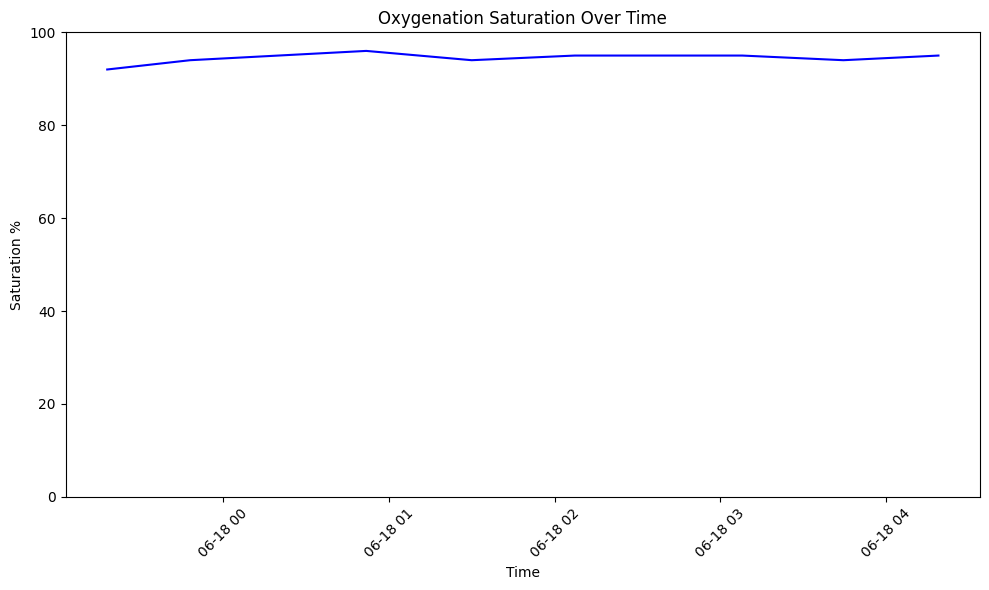

In [62]:
saturation_avg = data['sleep_health']['summary']['sleep_summary']['breathing']['saturation_avg_percentage_int']
saturation_max = data['sleep_health']['summary']['sleep_summary']['breathing']['saturation_maximum_percentage_int']
saturation_min = data['sleep_health']['summary']['sleep_summary']['breathing']['saturation_minimum_percentage_int']
saturation_granular = data['sleep_health']['summary']['sleep_summary']['breathing']['saturation_granular_data_array']


# Checking the average saturation value
if saturation_avg is not None and saturation_avg > 0:
    print(f"Saturation Average: {saturation_avg}%")
else:
    print("Saturation Average: No values were obtained or it is null")
    
# Checking the average saturation value
if saturation_max is not None and saturation_max > 0:
    print(f"Saturation Max: {saturation_max}%")
else:
    print("Saturation Max: No values were obtained or it is null")
    
# Checking the average saturation value
if saturation_min is not None and saturation_min > 0:
    print(f"Saturation Min: {saturation_min}%")
else:
    print("Saturation Min: No values were obtained or it is null")

# Creating a DataFrame for the granular data
if saturation_granular:
    df = pd.DataFrame(saturation_granular)
    df['datetime_string'] = pd.to_datetime(df['datetime_string'])
    
    # Plotting the bar chart for saturation
    plt.figure(figsize=(10, 6))
    plt.plot(df['datetime_string'], df['saturation_percentage_int'], color='blue', label='Saturation %')
    plt.ylim(0, 100)
    plt.title('Oxygenation Saturation Over Time')
    plt.xlabel('Time')
    plt.ylabel('Saturation %')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Saturation Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()